In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import os

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array


%matplotlib inline
image_dir = 'images'

import warnings
warnings.filterwarnings('ignore')

species = ['Apple', 'Bell Pepper', 'Blueberry', 'Cherry (including sour)',
       'Corn (maize)', 'Grape', 'Orange', 'Peach', 'Potato', 'Raspberry',
       'Soybean', 'Squash', 'Strawberry', 'Tomato']

classes = ['Apple Black rot', 'Apple Cedar apple rust', 'Apple healthy',
       'Apple scab', 'Bell Pepper Bacterial spot', 'Bell Pepper healthy',
       'Blueberry healthy', 'Cherry (including sour) Powdery mildew',
       'Cherry (including sour) healthy',
       'Corn (maize) Cercospora leaf spot Gray leaf spot',
       'Corn (maize) Common rust ', 'Corn (maize) Northern Leaf Blight',
       'Corn (maize) healthy', 'Grape Black rot',
       'Grape Esca (Black Measles)',
       'Grape Leaf blight (Isariopsis Leaf Spot)', 'Grape healthy',
       'Orange Haunglongbing (Citrus greening)', 'Peach Bacterial spot',
       'Peach healthy', 'Potato Early blight', 'Potato Late blight',
       'Potato healthy', 'Raspberry healthy', 'Soybean healthy',
       'Squash Powdery mildew', 'Strawberry Leaf scorch',
       'Strawberry healthy', 'Tomato Bacterial spot',
       'Tomato Early blight', 'Tomato Late blight', 'Tomato Leaf Mold',
       'Tomato Septoria leaf spot',
       'Tomato Spider mites Two-spotted spider mite',
       'Tomato Target Spot', 'Tomato Yellow Leaf Curl Virus',
       'Tomato healthy', 'Tomato mosaic virus']

## Main dataset

The final dataset is 50K images multiple labled plant dataset.

In [140]:
# import image data and combine labels
def load_data(image_size, image_dir):
    X = []
    y=[]
    labels =[]
    for root, folder, files in os.walk(image_dir):
        #print( folder)
        for f in files:
            #print(f)
            if f.lower().endswith('.jpg') or f.lower().endswith('.png') or f.lower().endswith('.jpeg'):
                #print(root, folder, f)
                img = load_img(f'{root}/{f}', target_size=(image_size,image_size,3))
                img_array = img_to_array(img, dtype='uint8')
                X.append(img_array)
                
                # get y
                specie, classname = root[20:].split('___')
                specie = specie.replace('_', ' ')
                classname = classname.replace('_', ' ')
                if classname[:len(specie)].lower() != specie.lower():
                    classname=specie +' ' + classname
                #print(species.index(specie), classes.index(classname))
                y.append([species.index(specie), classes.index(classname)])
                labels.append([specie, classname])
                
    return np.array(X, dtype=np.uint8), np.array(y), np.array(labels)

In [141]:
data_x, data_y, labels = load_data(224, 'data/multipleplants')

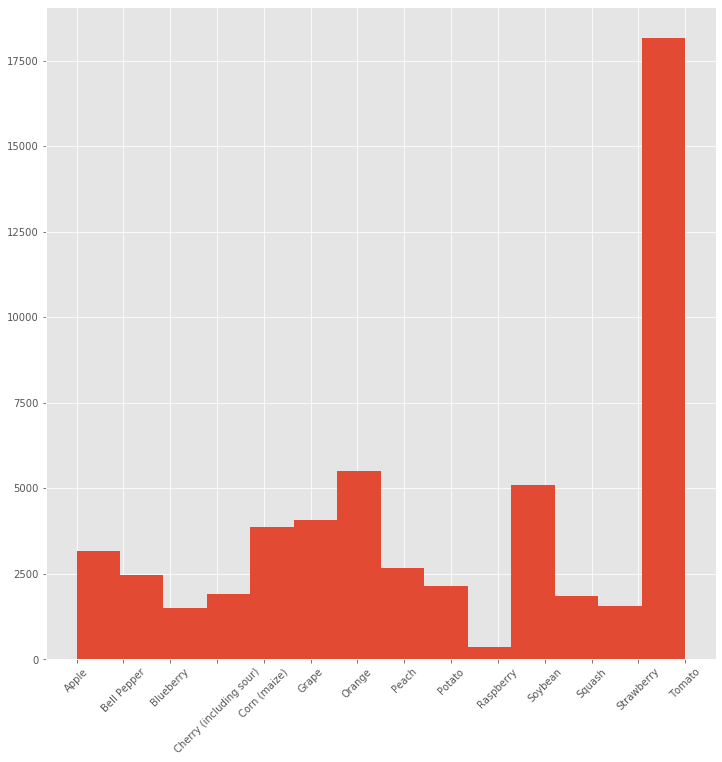

In [131]:
plt.figure(figsize=(12,12))
plt.hist(labels[:,0], bins = len(species)) 
plt.xticks(rotation=45)
plt.show()

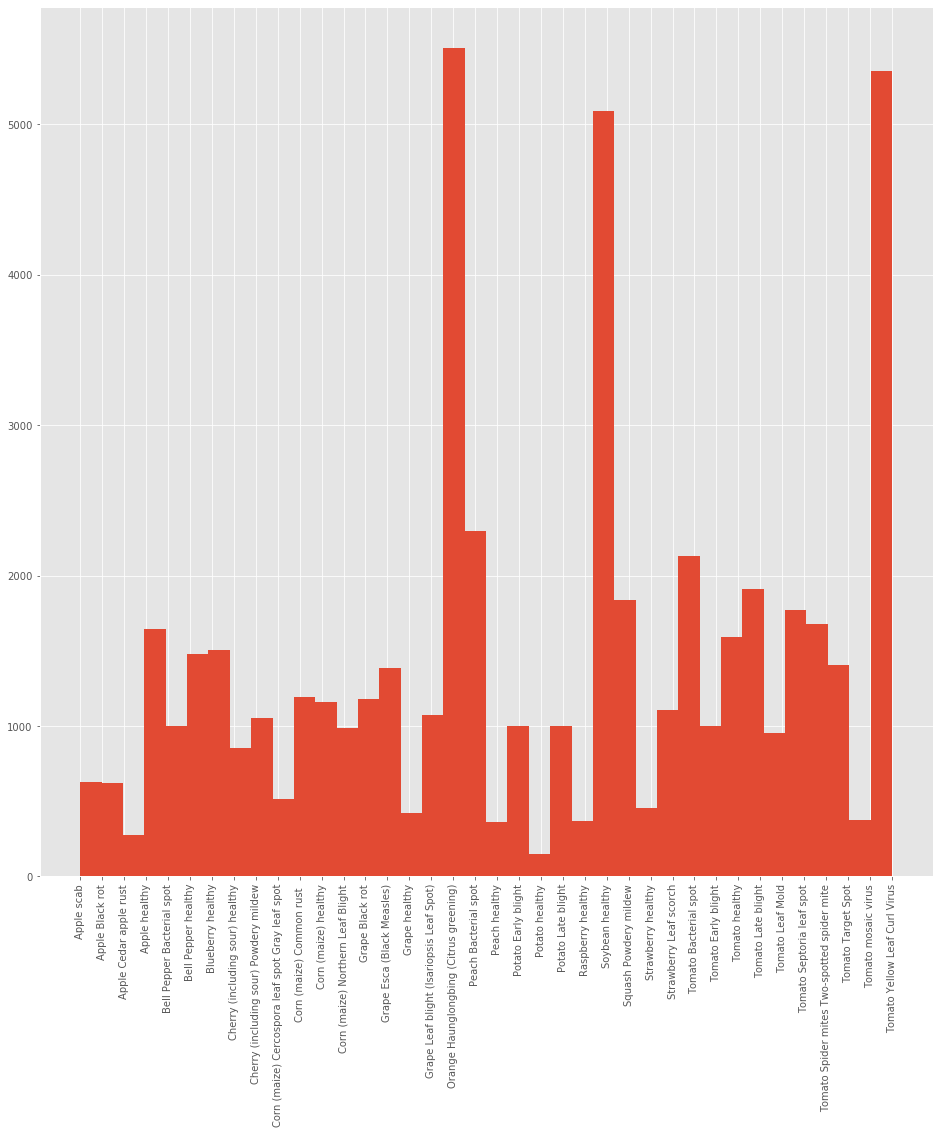

In [136]:
plt.figure(figsize=(16,16))
plt.hist(labels[:,1], bins = len(classes)) 
plt.xticks(rotation='vertical')
plt.show()

In [103]:
np.histogram(data_y[:,0], bins = np.arange(len(species)))

(array([ 3171,  2475,  1502,  1906,  3852,  4062,  5507,  2657,  2152,
          371,  5090,  1835, 19725], dtype=int64),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]))

In [98]:
np.histogram(data_y[:,1], bins = np.arange(len(classes)))

(array([ 621,  275, 1645,  630,  997, 1478, 1502, 1052,  854,  513, 1192,
         985, 1162, 1180, 1383, 1076,  423, 5507, 2297,  360, 1000, 1000,
         152,  371, 5090, 1835, 1109,  456, 2127, 1000, 1909,  952, 1771,
        1676, 1404, 5357, 1964], dtype=int64),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]))

In [137]:
def load_image(filename,show=True):
    #print(filename)
    img = load_img(filename, target_size=(224,224,3))
    img_array = img_to_array(img, dtype='uint8')
    if show:
        plt.imshow(img_array)
    else:
        return img_array

In [139]:
def show_images_matrix(image_list, nrows = 10, ncols =10, random = False):
    fig, axes = plt.subplots(figsize=(50 ,50), nrows=nrows, ncols=10)
    if random:
        img_filename = random.choice(image_list)
    else:
        img_id = 0
        img_filename = image_list[img_id]
        
    for ax in axes.ravel():
        #image = load_image(f'data/fgvc7/images/{img_filename}.jpg', False)
        img = load_img(f'data/fgvc7/images/{img_filename}.jpg', target_size=(50,50,3))
        img_array = img_to_array(img, dtype='uint8')
        if random:
            img_filename = random.choice(image_list)
        else:
            img_id += 1
            img_filename = image_list[img_id]

        ax.imshow(img_array)
        ax.axis('off')

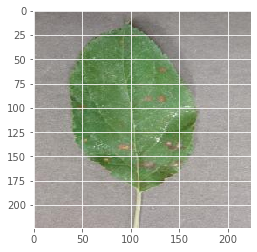

In [138]:
load_image(r'F:\notebooks\capstone\data\multipleplants\Apple___Cedar_apple_rust\0a41c25a-f9a6-4c34-8e5c-7f89a6ac4c40___FREC_C.Rust 9807.JPG')

In [ ]:
healthy_list = train_df[train_df["healthy"] ==1]['image_id'].to_numpy()
print(len(healthy_list))
show_images_matrix(healthy_list)

## Augmentation

In [ ]:
# Use data augmentation
import random
import imgaug as ia
import imgaug.augmenters as iaa

def do_augmentation(X_train):
    folder_path ='debug'
    seq = iaa.Sequential([
        iaa.SomeOf((1,3),[
            iaa.Identity(),
            iaa.Affine(translate_px={"x": (-30, 30), "y": (-30, 30)}),
            iaa.Rotate((-30,30)),
            iaa.Affine(scale=(0.8, 1.1)),
            iaa.Affine(shear=(-7, 7)),
            iaa.Dropout(p=(0, 0.1)),
            iaa.CropAndPad(percent=(-0.25, 0.25)),
            iaa.PiecewiseAffine(scale=(0.01, 0.05)),
            iaa.GaussianBlur(sigma=(0.0, 1.5)),
            iaa.GammaContrast((0.5, 2.0)),
            iaa.Multiply((0.5, 1.5))
           ])
            
    ])
    #seq_det = seq.to_deterministic()
    X_train_aug = np.zeros((X_train.shape),dtype='uint8')
    
    for i in range(len(X_train)):
        image_aug= seq(image=X_train[i])
        X_train_aug[i] = image_aug
    return X_train_aug

def generator(features, labels, batch_size):
    # create empty arrays to contain batch of features and labels
    batch_features = np.zeros((batch_size, features.shape[1], features.shape[2],3))
    
    # convert labels to keypoints
    while True:
        # Fill arrays of batch size with augmented data taken randomly from full passed arrays
        indexes = random.sample(range(len(features)), batch_size)
        # Perform the exactly the same augmentation for X and y
        random_augmented_images = do_augmentation(features[indexes])

        yield random_augmented_images, labels[indexes]
        
def show_generator_images(X,y):
    fig, axes = plt.subplots(figsize=(20, 20), nrows=6, ncols=5)
    reader= generator(X, y, 30)

    for ax in axes.ravel():
        v = next(reader)
        image = v[0][0]

        ax.imshow(image)
        ax.axis('off')

In [ ]:
show_generator_images(X_raw, y_raw)